# Load the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Diabetes Dataset

In [3]:
marks_df = pd.read_csv("marks.txt", header=None)
marks_df.head(20)

0          1  2
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
5   45.083277  56.316372  0
6   61.106665  96.511426  1
7   75.024746  46.554014  1
8   76.098787  87.420570  1
9   84.432820  43.533393  1
10  95.861555  38.225278  0
11  75.013658  30.603263  0
12  82.307053  76.481963  1
13  69.364589  97.718692  1
14  39.538339  76.036811  0
15  53.971052  89.207350  1
16  69.070144  52.740470  1
17  67.946855  46.678574  0
18  70.661510  92.927138  1
19  76.978784  47.575964  1

# Process the Dataset

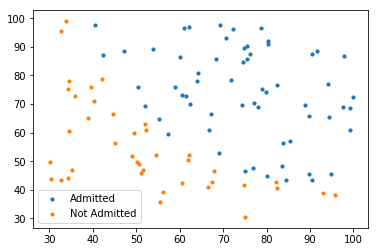

In [4]:
# X = feature values, all the columns except the last column
X = marks_df.iloc[:, :-1]

# y = target values, last column of the data frame
y = marks_df.iloc[:, -1]

# filter out the applicants that got admitted
admitted = marks_df.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = marks_df.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [5]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier Model

In [25]:
#from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

#model = LogisticRegression()
model = RandomForestClassifier(n_estimators=100)

model.fit(X, y)

/Users/anush/anaconda3/envs/dart/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Test (Predict) the Random Forest Classifier Model

In [26]:
predicted_classes = model.predict(X)

# Metrics

In [27]:
accuracy = accuracy_score(y.flatten(),predicted_classes)
print(accuracy)

1.0
